# Introduction to the Julia programming language

**Milan Klöwer** with materials from  
**Valentin Churavy, Mosè Giordano, Mauro Werder, Lazaro Alonso and many others**

# 1. Getting Started - Installing Julia

- via [julialang.org/install/](https://julialang.org/install/)
- uses [`juliaup`](https://github.com/julialang/juliaup) a version manager for Julia itself (written in Rust...)
- install v1.12 (or v1.11, v1.10)

# Resources

- Official documentation: [docs.julialang.org](https://docs.julialang.org)
- Differences from Python: [docs.julialang.org/...](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python)
- Modern Julia Workflows: [modernjuliaworkflows.org](https://modernjuliaworkflows.org)
- Discourse: [discourse.julialang.org](https://discourse.julialang.org)
- Slack: [julialang.org/slack/](https://julialang.org/slack/)
- Community Calendar: [julialang.org/community/#events](https://julialang.org/community/#events)
- YouTube channel: [youtube.com/user/JuliaLanguage](https://www.youtube.com/user/JuliaLanguage)
- JuliaCon: [juliacon.org](https://juliacon.org) (Paris, Oct 2025; Germany, August 2026)

# Using IJulia

First install jupyter or jupyter-lab via [jupyter.org/install](https://jupyter.org/install)
then [IJulia](https://github.com/JuliaLang/IJulia.jl) allows to run Jupyter notebooks with a Julia kernel
that has to be installed

```julia
using Pkg
Pkg.add("IJulia")
using IJulia
installkernel("Julia")
```

which can also be used in VS Code!

# Where to run julia?

1. Julia REPL (Read-Evaluate-Print-Loop, terminal) start with `> julia`
    - great for playing around, testing
    - and the package manager
2. Jupyter notebooks (this one here)
   - document whole workflows
   - include visualisation
3. Pluto notebooks
   - interactive (sliders, automatically updated graphs etc) 
4. VS Code
   - fantastic language integration
   - package development
5. VS Code on [github.dev](https://github.dev/github/dev)
   - excellent editor in your browser
   - integrates well with GitHub development
6. ... and a million other ways!

In [1]:
a = 1+1

2

# 2. Package manager Pkg

see [Pkg.jl](https://pkgdocs.julialang.org/v1/) the _one and only_ (dependency hell bye bye!)
You can use

In [2]:
using Pkg
Pkg.status()

Status `~/.julia/environments/v1.12/Project.toml`
  [79e6a3ab] Adapt v4.4.0
  [6e4b80f9] BenchmarkTools v1.6.3
  [de688a37] BitInformation v0.6.3
  [336ed68f] CSV v0.10.15
  [13f3f980] CairoMakie v0.15.8
  [a93c6f00] DataFrames v1.8.1
  [ffbed154] DocStringExtensions v0.9.5
  [e30172f5] Documenter v1.16.1
  [7da242da] Enzyme v0.13.129
  [7a1cc6ca] FFTW v1.10.0
  [5789e2e9] FileIO v1.18.0
  [e9467ef8] GLMakie v0.13.8
  [0c68f7d7] GPUArrays v11.4.0
  [cf35fbd7] GeoInterface v1.6.0
  [db073c08] GeoMakie v0.7.16
⌃ [7073ff75] IJulia v1.34.2
  [27aeb0d3] JLArrays v0.3.1
  [033835bb] JLD2 v0.6.3
⌃ [63c18a36] KernelAbstractions v0.9.39
  [2ec943e9] Libz v1.0.1
  [ed20b33f] LowerTriangularArrays v0.1.2 `~/git/SpeedyWeather/LowerTriangularArrays`
  [b2108857] Lux v1.31.3
  [ee78f7c6] Makie v0.24.8
  [dde4c033] Metal v1.9.2
  [85f8d34a] NCDatasets v0.14.11
  [3bd65402] Optimisers v0.4.7
  [e4faabce] PProf v3.2.0
  [c3e4b0f8] Pluto v0.20.21
  [7f904dfe] PlutoUI v0.7.79
  [27ebfcd6] Primes v0.5.7
 

or a `]` (in the REPL) to open the package manager

In [3]:
] status --outdated

Status `~/.julia/environments/v1.12/Project.toml`
⌃ [7073ff75] IJulia v1.34.2 (<v1.34.3)
⌃ [63c18a36] KernelAbstractions v0.9.39 (<v0.9.40)
⌃ [3c362404] Reactant v0.2.216 (<v0.2.220)
  [9e226e20] SpeedyWeather v0.18.0 `~/git/SpeedyWeather/SpeedyWeather` (<v0.18.1)


# Environments

In [4]:
Pkg.activate(".")
Pkg.status()

  Activating project at `~/git/PolarPlunge.jl/01_Intro`


Status `~/git/PolarPlunge.jl/01_Intro/Project.toml`
  [6e4b80f9] BenchmarkTools v1.6.3
  [992eb4ea] CondaPkg v0.2.34
  [e9467ef8] GLMakie v0.13.8
  [a8297547] GenericFFT v0.1.6
  [ee78f7c6] Makie v0.24.8
  [eff96d63] Measurements v2.14.1
  [27ebfcd6] Primes v0.5.7
  [6099a3de] PythonCall v0.9.31
  [ce6b1742] RDatasets v0.8.1
  [8ba89e20] Distributed v1.11.0
  [37e2e46d] LinearAlgebra v1.12.0
  [1a1011a3] SharedArrays v1.11.0


# 3. Multiple dispatch

The (dominating) programming paradigm of Julia. Which "version" (we say method) of a function is called depends on the
__type of all input arguments__.

In [6]:
plus1(x) = x + 1

plus1 (generic function with 1 method)

now defining a new method to *extend* it's functionality for a specific type

In [7]:
plus1(x::AbstractFloat) = x + 2  # wrong but to illustrate
plus1(x::Float64) = x + 3        # also

plus1 (generic function with 3 methods)

In [8]:
plus1(1)

2

The way to think about it: A function is a conceptual thing that is supposed to do something (e.g. `sort` to sort) but a method is a concrete implementation of this function for a specific type.

# Multiple dispatch playing 🪨📜✂️

Let us play rock, paper, scissors in a few lines of code and put it in a `module` as if it was it's own package

In [9]:
module RockPaperScissors

    abstract type Shape end

    export Shape, Rock, Paper, Scissors, play

    struct Rock     <: Shape end
    struct Paper    <: Shape end
    struct Scissors <: Shape end

    # note how the function "play" is defined 5 times (we say it has 5 methods)
    play(::Paper, ::Rock)     = "Paper wins"
    play(::Paper, ::Scissors) = "Scissors wins"
    play(::Rock,  ::Scissors) = "Rock wins"
    play(::T, ::T) where {T <: Shape} = "Tie, try again"
    play(a::Shape, b::Shape) = play(b, a) # Commutativity
end

Main.RockPaperScissors

Now we use `RockPaperScissors` (the `.` is added to refer to a local "package" not one added to your environment, managed by the package manager)

In [10]:
using .RockPaperScissors

In [11]:
play(Rock(), Paper())

"Paper wins"

In [13]:
play(Scissors(), rand([Scissors, Paper, Rock])())

"Tie, try again"

# Extensibility 🪨📜✂️ + 💥🔫

Now imagine we have some functionality in `RockPaperScissors` we would like to extend. We can simply do

In [14]:
struct Laser <: RockPaperScissors.Shape end
RockPaperScissors.play(::Shape, ::Laser)  = "Laser always wins"

And code from the package and your own code can seamlessly work together!

In [15]:
play(Laser(), Rock())

"Laser always wins"

Note that this first calls the commutativity method inside `RockPaperScissors` and then your extended function defined externally but interweaves this code and compiles it together!

Also the old code still works without overwriting anything

In [16]:
play(Rock(), Paper())

"Paper wins"

This leads us to a philosophy in SpeedyWeather and Oceananigans where you often do not have to branch the repository
in order to define a new model component, e.g. to define a new forcing. You can often just do that
directly in your current notebook/terminal!

# 5. Code composability

Now this is where the black magic happens, let's load packages that are **independent**
but can be executed together. 

We want to compute a Fourier transform on data with error bars!

In [17]:
using GenericFFT, Measurements

In [18]:
x = rand(8)            # raw data

8-element Vector{Float64}:
 0.7670656160499221
 0.05722393707398976
 0.5227562605043248
 0.41351232649665437
 0.13757876882903164
 0.1376768393606821
 0.12074496582469996
 0.5762706071376891

In [19]:
x = rand(8) .± 0.1     # with error bars

8-element Vector{Measurement{Float64}}:
  0.91 ± 0.1
  0.45 ± 0.1
 0.035 ± 0.1
 0.032 ± 0.1
  0.88 ± 0.1
  0.52 ± 0.1
 0.003 ± 0.1
 0.026 ± 0.1

The `±` is implement by Measurements.jl and returns here `Vector{Measurement{Float64}}` not just a `Vector{Float64}`.
Arithmetic (`+`, `*`, ...) for `Measurement{Float64}` is defined differently than for `Float64` alone (it also needs to propagate the error). The `fft` is written generically in  GenericFFT.jl so that Julia will compile `fft` with every `+`, `*`, ... using the arithmetics defined in Measurements.jl and therefore return a Fourier transform using error bars!

In [20]:
ξ = fft(x)

8-element Vector{Complex{Measurement{Float64}}}:
  (2.86 ± 0.28) + (0.0 ± 0.0)im
 (-0.028 ± 0.2) + (0.016 ± 0.2)im
   (1.76 ± 0.2) - (0.91 ± 0.2)im
  (0.085 ± 0.2) + (0.079 ± 0.2)im
  (0.81 ± 0.28) + (0.0 ± 0.0)im
  (0.085 ± 0.2) - (0.079 ± 0.2)im
   (1.76 ± 0.2) + (0.91 ± 0.2)im
 (-0.028 ± 0.2) - (0.016 ± 0.2)im

# 5. Interaction with Python and R

In [21]:
using RDatasets

In [22]:
iris = dataset("datasets", "iris")    # load some default data from R

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 141 │         6.7         3.1          5.6         2.4  virginica
 142 │         6.9         3.1          5.1         2.3  virginica
 143 │         5.8         2.7          5.1         1.9  virginica
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   129 rows omitted

# Using matplotlib?

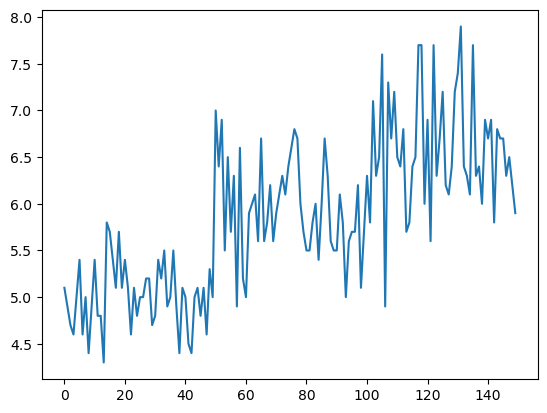

In [39]:
using PythonPlot
plt = PythonPlot
plt.plot(iris[:, "SepalLength"])
plt.show()

# Using numpy?

In [40]:
using CondaPkg
CondaPkg.add("numpy")

    CondaPkg Found dependencies: /Users/milan/git/PolarPlunge.jl/01_Intro/CondaPkg.toml
    CondaPkg Found dependencies: /Users/milan/.julia/packages/CondaPkg/8GjrP/CondaPkg.toml
    CondaPkg Found dependencies: /Users/milan/.julia/packages/PythonCall/83z4q/CondaPkg.toml
    CondaPkg Found dependencies: /Users/milan/.julia/packages/PythonPlot/oS8x4/CondaPkg.toml
    CondaPkg Found dependencies: /Users/milan/.julia/packages/Reactant/vZMtU/CondaPkg.toml
    CondaPkg Initialising pixi
             │ /Users/milan/.julia/artifacts/d2fecc2a9fa3eac2108d3e4d9d155e6ff5dfd0b2/bin/pixi
             │ init
             │ --format pixi
             └ /Users/milan/git/PolarPlunge.jl/01_Intro/.CondaPkg
✔ Created /Users/milan/git/PolarPlunge.jl/01_Intro/.CondaPkg/pixi.toml
    CondaPkg Wrote /Users/milan/git/PolarPlunge.jl/01_Intro/.CondaPkg/pixi.toml
             │ [dependencies]
             │ openssl = ">=3, <3.6"
             │ uv = ">=0.4"
             │ matplotlib = ">=1"
             │ seaborn 

In [41]:
np = pyimport("numpy")

Python: <module 'numpy' from '/Users/milan/git/PolarPlunge.jl/01_Intro/.CondaPkg/.pixi/envs/default/lib/python3.12/site-packages/numpy/__init__.py'>

In [42]:
A = np.random.randn(3,4)

Python:
array([[-1.10101766, -1.84763329,  0.1255558 ,  0.02746321],
       [ 0.60338587,  0.57103002, -1.90440716, -0.19500012],
       [-1.3891635 ,  0.50720129,  0.51131768,  0.11680974]])

In [43]:
np.sort(A)

Python:
array([[-1.84763329, -1.10101766,  0.02746321,  0.1255558 ],
       [-1.90440716, -0.19500012,  0.57103002,  0.60338587],
       [-1.3891635 ,  0.11680974,  0.50720129,  0.51131768]])

# 6. Plotting with Makie

[Makie](https://makie.org/website/) comes with several backends, CairoMakie is for static high-quality paper-ready plots, GLMakie is faster and more interactive plus 3D. There is also a WebGL backend for [interactive animations in the browser](https://bonitobook.org/website/examples/intro/)!

In [44]:
using GLMakie

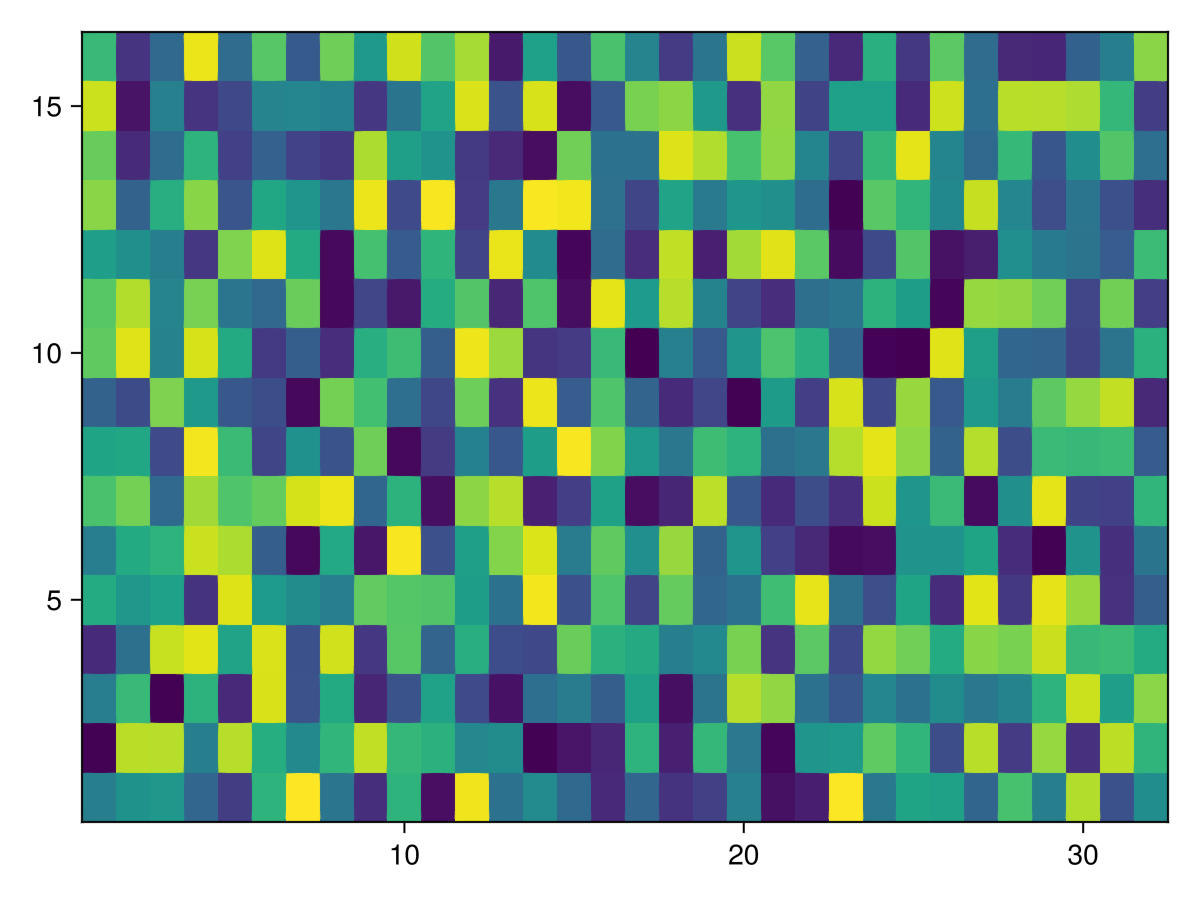

In [45]:
heatmap(rand(32,16))

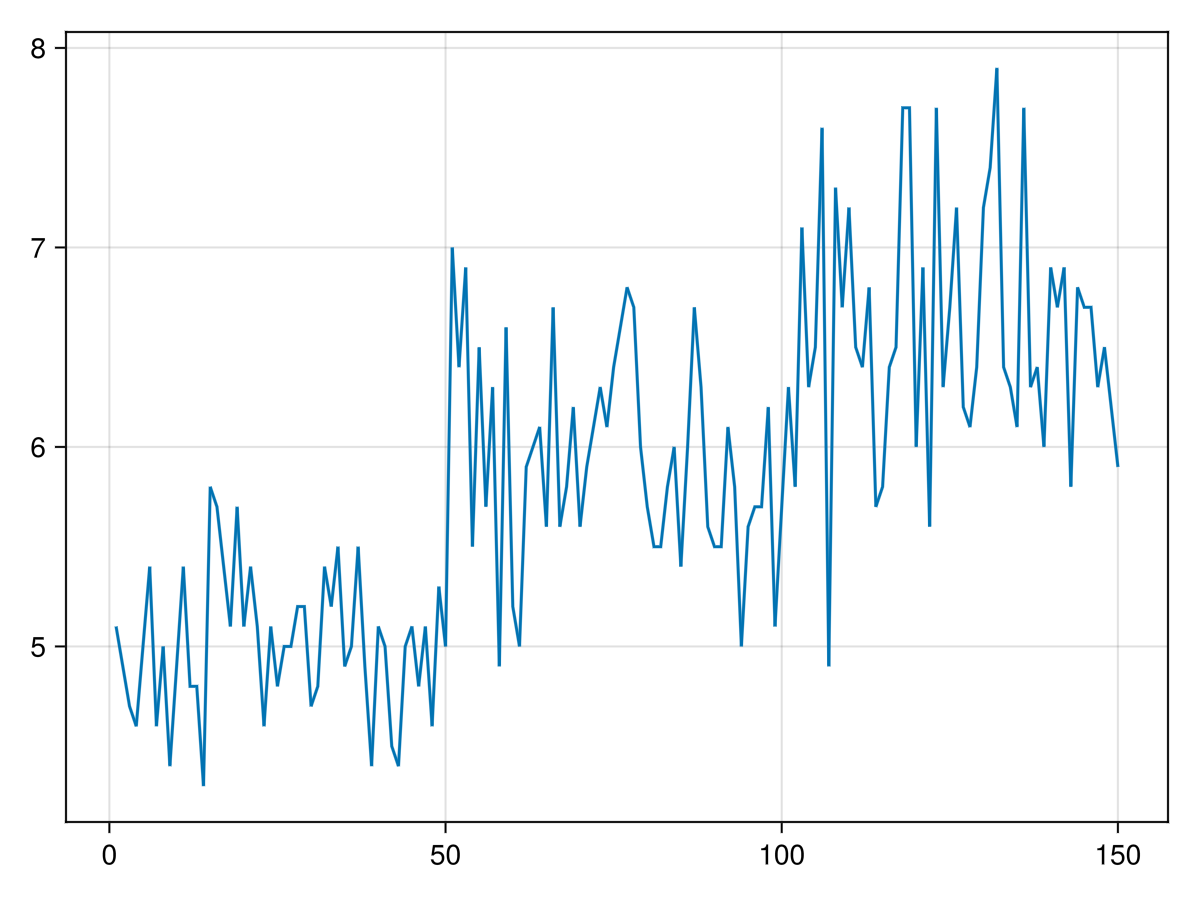

In [46]:
lines(iris[:, "SepalLength"])

# 7. Just-in-time compiled

Julia is a just-in-time compiled language. Leaving the compilation to the very end is very convenient as code is compiled only as it is used. In practice, this means that the first time you execute a function it'll take a teeny bit to a while (compiling ...) the 2nd time it's fast

In [47]:
@time @eval exp([1 2; 3 4])

  0.620724 seconds (1.93 M allocations: 93.205 MiB, 99.90% compilation time)


2×2 Matrix{Float64}:
  51.969   74.7366
 112.105  164.074

In [48]:
@time @eval exp([1 2; 3 4])

  0.000325 seconds (107 allocations: 4.547 KiB)


2×2 Matrix{Float64}:
  51.969   74.7366
 112.105  164.074

# 8. Measure performance

## Example: Gaussian

Calculate some Gaussian over any inputs `x`

$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)
$

In [83]:
gaussian(x, μ=0.0, σ=1) = @. 1/(σ*√(2π)) * exp(-1/2 * ((x-μ)/σ)^2)

gaussian (generic function with 3 methods)

__Julia is (usually) fast. But how to be sure you don't have the brakes on?__

Now evalulate `gaussian` for values between -3 and 3

In [84]:
x = collect(-3:0.1:3)
g = gaussian(x)

61-element Vector{Float64}:
 0.0044318484119380075
 0.005952532419775854
 0.007915451582979969
 0.010420934814422592
 0.013582969233685613
 0.01752830049356854
 0.0223945302948429
 0.028327037741601186
 0.035474592846231424
 0.04398359598042719
 0.05399096651318806
 0.0656158147746766
 0.07895015830089415
 ⋮
 0.0656158147746766
 0.05399096651318806
 0.04398359598042719
 0.035474592846231424
 0.028327037741601186
 0.0223945302948429
 0.01752830049356854
 0.013582969233685613
 0.010420934814422592
 0.007915451582979969
 0.005952532419775854
 0.0044318484119380075

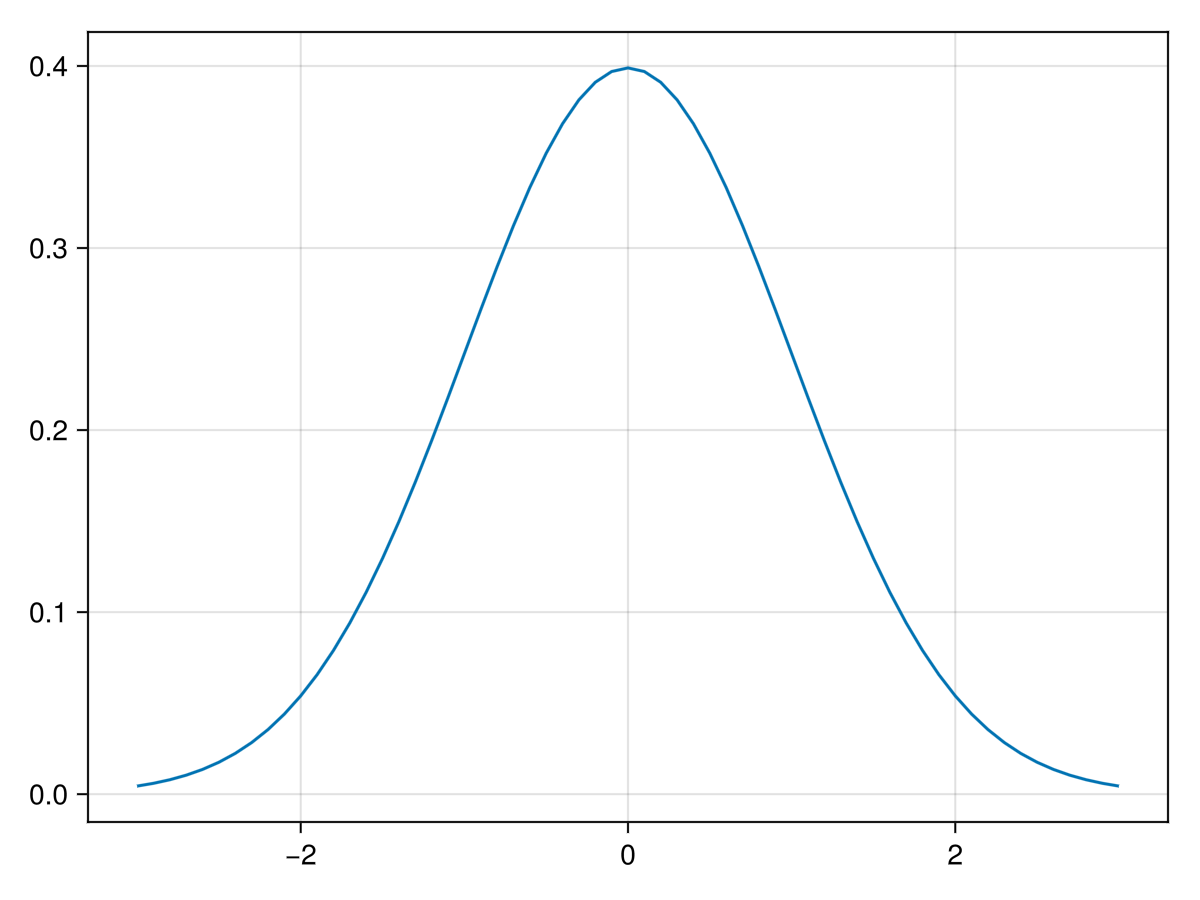

In [85]:
lines(x, g)

So it does the right thing, but is it fast? How do I know it's fast? And if not, what is the bottle neck?

## Example: Gaussian

Julia has the `@time` macro, that puts a timer around the evaluation of whatever follows.

In [86]:
@time gaussian(x);

  0.000014 seconds (2 allocations: 576 bytes)


Some μs I guess, but is this measurement robust? And how do I know how Julia actually translates `gaussian` for my input `x::Vector{Float64}`?

In [87]:
x32 = Float32.(x)
gaussian(x32)
@time gaussian(x32);

  0.000015 seconds (2 allocations: 576 bytes)


Why am I not saving memory? And is it faster? Not sure ...

## Example: Gaussian

Maybe let's do it like C/Fortran and be more specific, declare many things, explicit loops, precompute stuff, ...

In [88]:
function gaussian_oldschool(x::Array{Float64}, μ=0.0, σ=1.0)
    
    n = size(x)
    g = Array{Float64}(undef,n...)    # allocate output
    c = 1/(σ*sqrt(2*π))               # precompute scaling constant

    for i in 1:length(x)
        g[i] = c*exp(-1/2*((x[i]-μ)/σ)^2)
    end

    return g
end

gaussian_oldschool (generic function with 3 methods)

In [89]:
gaussian_oldschool(x)    # triggers compilation
@time gaussian_oldschool(x);

  0.000011 seconds (2 allocations: 576 bytes)


In [90]:
@time gaussian_oldschool(x32)

LoadError: MethodError: no method matching gaussian_oldschool(::Vector{Float32})
The function `gaussian_oldschool` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  gaussian_oldschool([91m::Array{Float64}[39m)
[0m[90m   @[39m [32mMain[39m [90m[4mIn[88]:1[24m[39m
[0m  gaussian_oldschool([91m::Array{Float64}[39m, [91m::Any[39m, [91m::Any[39m)
[0m[90m   @[39m [32mMain[39m [90m[4mIn[88]:1[24m[39m
[0m  gaussian_oldschool([91m::Array{Float64}[39m, [91m::Any[39m)
[0m[90m   @[39m [32mMain[39m [90m[4mIn[88]:1[24m[39m


But my abstractions!! We obviously want generic and fast code, so that might not be the way to do it? Let's measure it!!

# 9. BenchmarkTools.jl

Previously, we only had the following information

In [91]:
@time rand(100);

  0.000003 seconds (2 allocations: 928 bytes)


Now, we want to use BenchmarkTools.jl which executes the function several times for a more robust estimate

In [92]:
using BenchmarkTools

In [93]:
@btime rand(100);

  114.129 ns (2 allocations: 928 bytes)


It can even print a whole histogram of execution times

In [94]:
@benchmark rand(100)

BenchmarkTools.Trial: 10000 samples with 916 evaluations per sample.
 Range (min … max):  116.449 ns …  43.344 μs  ┊ GC (min … max):  0.00% … 99.37%
 Time  (median):     159.138 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):   221.126 ns ± 853.074 ns  ┊ GC (mean ± σ):  20.13% ± 12.16%

   ▄█                                                            
  ▄██▄▃▃▆▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂ ▂
  116 ns           Histogram: frequency by time         1.24 μs <

 Memory estimate: 928 bytes, allocs estimate: 2.

Globals should get a `$` for more accurate measurement

In [95]:
@btime gaussian($x);

  318.551 ns (2 allocations: 576 bytes)


In [96]:
@btime gaussian_oldschool($x);

  316.559 ns (2 allocations: 576 bytes)


And now the same in single precision

In [97]:
@btime gaussian($x32);

  316.176 ns (2 allocations: 576 bytes)


# 10. A 101 on compilation and why it matters

Julia goes through several steps from your code (a `String`!) to machine code these are

1. Parsing, Lowering, Abstract interpretation based type-inference and High-level optimizations
2. Code generation to LLVM (a compiler tool used by many other languages too) 
3. Native (machine) code

But the cool thing is that Julia lets you inspect these layers, so if you want to know
you can always check what code is actually executed when you call `f(x)`!

Let's illustrate this using the following function

In [98]:
f(x) = x + sqrt(2π)

f (generic function with 1 method)

What actually happens in `f`? You may think

- a = convert π to float?
- b = convert `2` to `2.0`
- c = multiply `2.0*3.141...`
- d = sqrt(c)
- e = convert `x` to Float64?
- e+d

But how could you know? Julia let's you inspect lower layers of the compiler system (don't worry I don't really understand them either...)

In [102]:
@code_llvm f(1)

; Function Signature: f(Int64)
;  @ In[98]:1 within `f`
define double @julia_f_48086(i64 signext %"x::Int64") #0 {
top:
; ┌ @ promotion.jl:433 within `+`
; │┌ @ promotion.jl:404 within `promote`
; ││┌ @ promotion.jl:379 within `_promote`
; │││┌ @ number.jl:7 within `convert`
; ││││┌ @ float.jl:245 within `Float64`
       %0 = sitofp i64 %"x::Int64" to double
; │└└└└
; │ @ promotion.jl:433 within `+` @ float.jl:495
   %1 = fadd double %0, 0x40040D931FF62705
   ret double %1
; └
}


So the `sqrt(2π)` operation is actually executed at compile time, hardcoding `+ 0x40040D931FF62705` into the compiled function (because the compiler correctly figured out that this is a constant. Neat!

Julia also tells you which intermediate function calls (`+`, `promote`, ...) are all compiled together into one single function call!

# 11. Intermediate representations

Question, which one is faster?

In [103]:
f1(x, y) = x * ℯ^y
f2(x, y) = x * exp(y)
f3(x, y) = x * exp(1)^y

f3 (generic function with 1 method)

We can investigate the compiled code with `@code_llvm`, we have
- Julia code ->
- Typed code (`@code_typed`) ->
- Lowered code (`@code_lowered`) ->
- LLVM code (`@code_llvm`) (__This one contains all optimizations but is still readable!!!__) ->
- Assembly code (`@code_native`) ->
- Machine code

In [104]:
@code_llvm f1(1.5, 2.0)

; Function Signature: f1(Float64, Float64)
;  @ In[103]:1 within `f1`
define double @julia_f1_48101(double %"x::Float64", double %"y::Float64") #0 {
top:
; ┌ @ mathconstants.jl:139 within `^`
   %0 = call double @j_exp_48104(double %"y::Float64")
; └
; ┌ @ float.jl:497 within `*`
   %1 = fmul double %0, %"x::Float64"
   ret double %1
; └
}


So `f1` just calls `exp(y)` then `x*`

In [105]:
@code_llvm f2(1.5, 2.0)

; Function Signature: f2(Float64, Float64)
;  @ In[103]:2 within `f2`
define double @julia_f2_48105(double %"x::Float64", double %"y::Float64") #0 {
top:
  %0 = call double @j_exp_48108(double %"y::Float64")
; ┌ @ float.jl:497 within `*`
   %1 = fmul double %0, %"x::Float64"
   ret double %1
; └
}


Here it turns out `f2` is compiled to exactly the same code!

In [106]:
@code_llvm f3(1.5, 2.0)

; Function Signature: f3(Float64, Float64)
;  @ In[103]:3 within `f3`
define double @julia_f3_48120(double %"x::Float64", double %"y::Float64") #0 {
top:
; ┌ @ math.jl:1142 within `^`
; │┌ @ float.jl:699 within `abs`
    %0 = call double @llvm.fabs.f64(double %"y::Float64")
; │└
; │┌ @ float.jl:623 within `<`
    %1 = fcmp olt double %0, 0x43D8000000000000
; │└
   br i1 %1, label %L14, label %L6

L6:                                               ; preds = %top
; │ @ math.jl:1143 within `^`
; │┌ @ float.jl:709 within `isnan`
; ││┌ @ float.jl:622 within `!=`
     %2 = fcmp ord double %"y::Float64", 0.000000e+00
; │└└
   br i1 %2, label %L9, label %L42

L9:                                               ; preds = %L6
; │ @ math.jl:1144 within `^`
; │┌ @ number.jl:162 within `sign`
; ││┌ @ float.jl:623 within `<`
     %3 = fcmp uge double %"y::Float64", 0.000000e+00
; ││└
; ││┌ @ operators.jl:425 within `>`
; │││┌ @ float.jl:623 within `<`
      %4 = fcmp ule double %"y::Float64", 0.000000e

Oh gosh, look at that code that's all executed! Clearly better avoided. In most cases you don't even have to understand what's happening just that a lot *is* happening (which takes time)!

# 12. Allocations and garbage collection

Keep an eye on memory that needs to be allocated and garbage collected if no longer used

In [107]:
using LinearAlgebra
A = rand(1000,1000);    # 8MB array

Two functions that are mathematically identical

In [108]:
function matrix_norm_v1(A)
    LinearAlgebra.norm(2A)   # 2A has to be allocated and stored
end                          # but is garbage collected afterwards

function matrix_norm_v2(A)
    2*LinearAlgebra.norm(A)  # scalar multiply only
end

matrix_norm_v2 (generic function with 1 method)

But with possibly very different timings because of additional allocation and subsequent garbage collection

In [109]:
@btime matrix_norm_v1($A)

  2.183 ms (3 allocations: 7.64 MiB)


1153.4226795496522

In [110]:
@btime matrix_norm_v2($A)

  1.916 ms (0 allocations: 0 bytes)


1153.4226795496522

### Consider in-place operations! or views for big data

This avoids allocations but overwrites inputs (not always desired)

In [111]:
using GenericFFT
z = randn(Complex{Float64},1000_000)
@btime ifft(fft($z));

  33.127 ms (16 allocations: 30.53 MiB)


In [112]:
sizeof(z) / 1000^2   # in MB

16.0

So this version consumes 3x as much memory than doing things in-place!

In [113]:
@btime ifft!(fft!($z));

  32.650 ms (10 allocations: 544 bytes)


# 13. Multi-threading

Think about several processors working independently but using the same memory

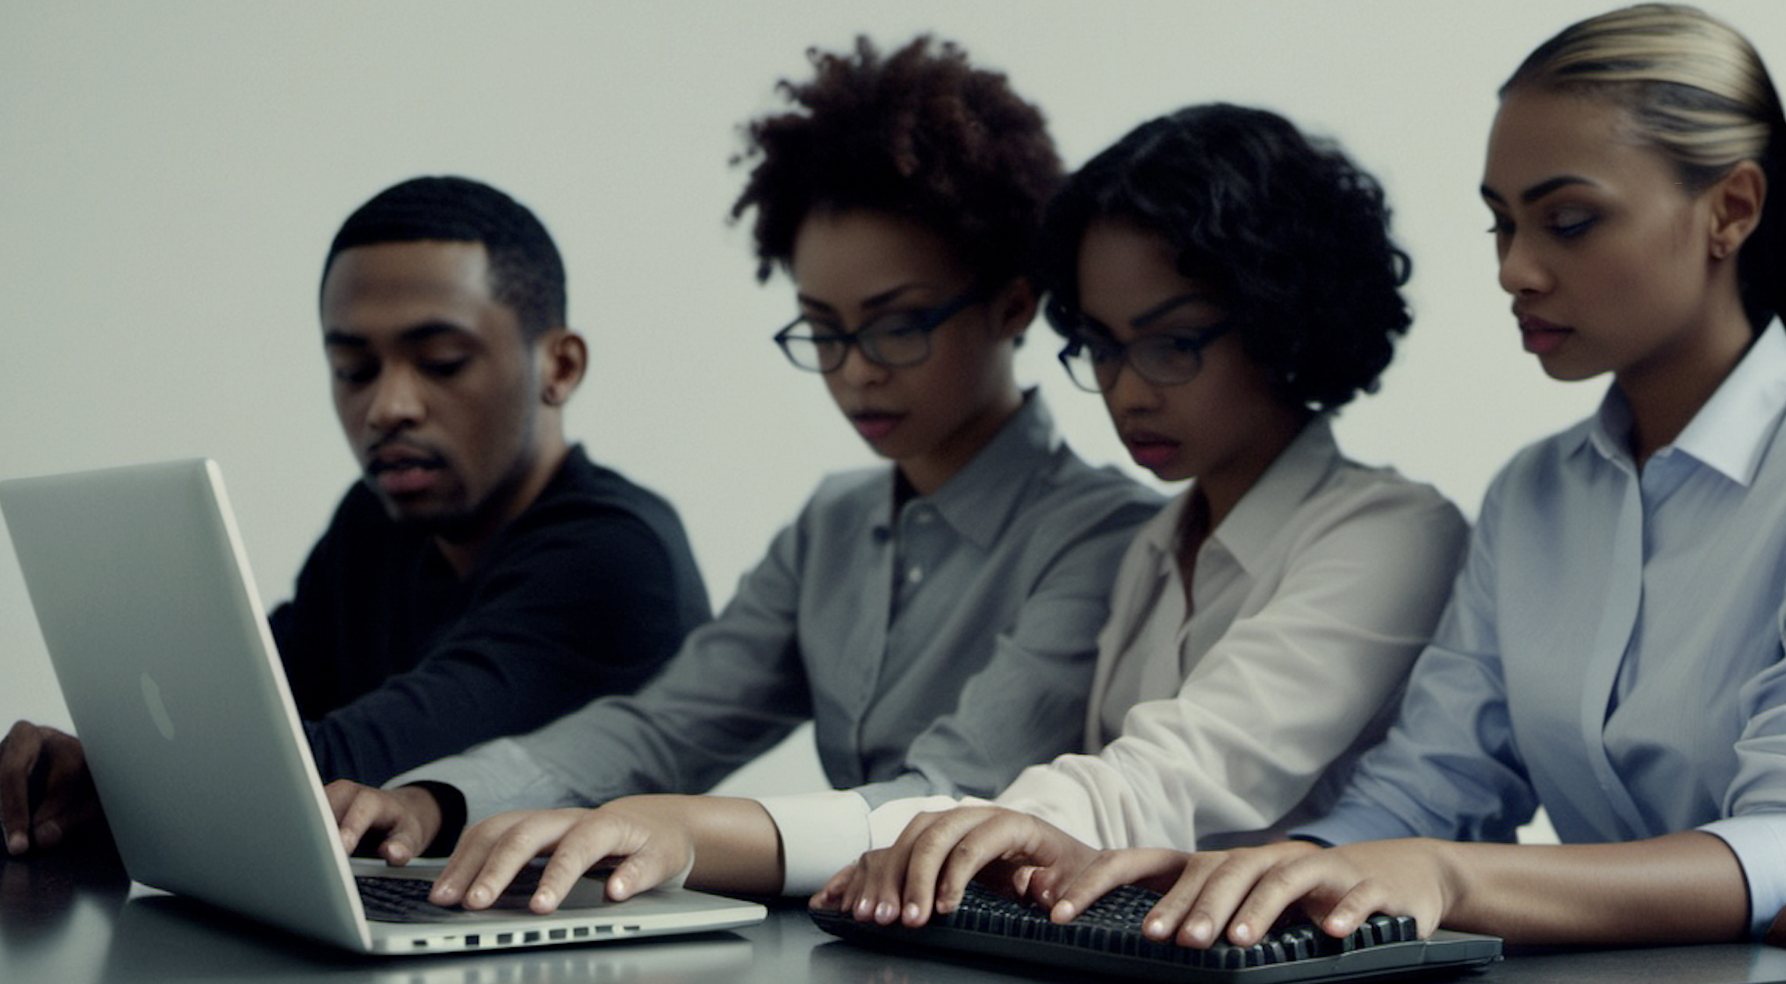

The number of threads have to be chosen when launching julia. You can start Julia with 4 threads with

```
julia --threads 4
```

or `using IJulia; installkernel("Julia --threads 4", "-t4")` to install a separate kernel with 4 threads!

In [114]:
Threads.nthreads()

1

But who am I?

In [115]:
Threads.threadid()

1

This is the main thread. Additional threads are launched as worker threads. Now we can use 4 threads (~4 processors) each with an id 2, 3, 4 or 5 (main thread is id 1)

In [116]:
n = 10
v = zeros(Int,n)

Threads.@threads for i in 1:n
    v[i] = Threads.threadid()
end

v

10-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

# 14. Data race conditions

What happens if several processors access the same memory simultaneously?

In [117]:
function race(n)
    a = 0
    Threads.@threads for i in 1:n
        a += 1
    end
    return a
end

race (generic function with 1 method)

In [118]:
race(100_000)

100000

Probably not what you expected. That's a race condition.

Example race condition (from Wikipedia)

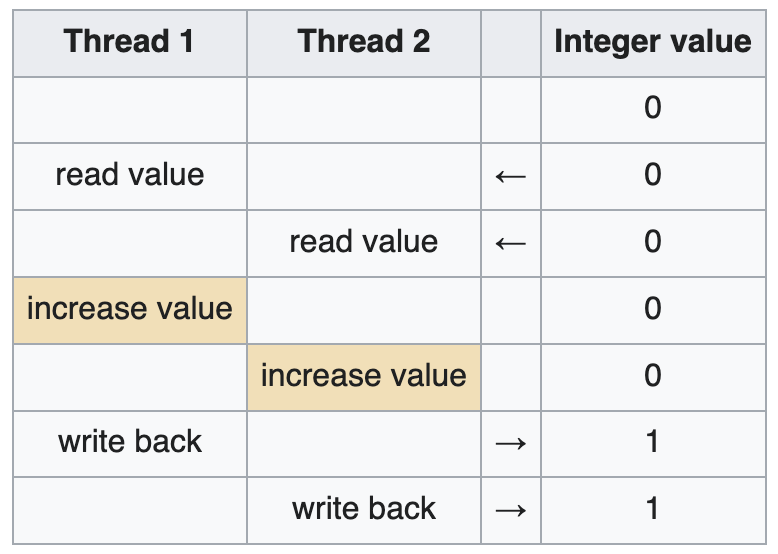

Safe use of threads with no overlapping data access:

In [119]:
n, m = 10, 10
A = randn(n,m)

Threads.@threads for i in 1:m
    column = view(A,:,i)    # because A[:, i] would create a copy
    sort!(column)
end

A

10×10 Matrix{Float64}:
 -2.39461   -1.67232   -2.37495     …  -2.54608     -0.908826   -1.48039
 -1.20577   -1.37663   -1.44689        -1.87375     -0.690456   -1.30612
 -0.94756   -1.2859    -0.559344       -1.36021     -0.479067   -1.09956
 -0.721871  -1.17988   -0.183619       -0.904756    -0.46866    -0.96557
 -0.241278  -0.824902   0.00463885     -0.657543    -0.443647   -0.886339
 -0.109384  -0.30163    0.0768915   …   0.00228765  -0.357377   -0.140498
  0.12191    0.241002   0.455029        0.0138809   -0.239571    0.24957
  0.281382   0.241257   0.667906        0.377326    -0.0580686   0.357282
  0.293924   0.57414    0.876375        0.655225     0.336102    0.522562
  1.2127     1.62619    0.932251        0.669316     0.523543    1.08672

# 15. Distributed parallelism

Now we turn to N processors with __independent__ memory. Let's add some workers

In [120]:
using Distributed

In [121]:
Distributed.addprocs(4)

4-element Vector{Int64}:
 2
 3
 4
 5

Now we have some workers with ids 2, 3, 4, ... Same idea applies here: The main process has id 1.

### Distributed prime factorization

Distribute across workers, seemingly similar to multi-threading

In [122]:
# load a package on all workers
@everywhere using Primes

@distributed for i in 1_000_000:1_000_010
    
    # do a prime factorization
    factors = Primes.factor(i)

    # pretty printing
    println("$i = "*repr("text/plain",factors))
end

Task (runnable, started) @0x00000001362db670

      From worker 4:	1000006 = 2 * 7 * 71429
      From worker 2:	1000000 = 2^6 * 5^6
      From worker 4:	1000007 = 29 * 34483
      From worker 4:	1000008 = 2^3 * 3^2 * 17 * 19 * 43
      From worker 3:	1000003 = 1000003
      From worker 3:	1000004 = 2^2 * 53^2 * 89
      From worker 3:	1000005 = 3 * 5 * 163 * 409
      From worker 5:	1000009 = 293 * 3413
      From worker 5:	1000010 = 2 * 5 * 11 * 9091
      From worker 2:	1000001 = 101 * 9901
      From worker 2:	1000002 = 2 * 3 * 166667


# 16. MapReduce

Distribute (=map) across workers, but "gather" in a reduction function here `(+)` 

In [123]:
nheads = @distributed (+) for i = 1:1000
    rand(Bool)
end

500

4 workers have tossed 1000 coins with ~50% tail! Yay!

### Use arrays shared between workers
Distribute 100 years of data across workers, let them find the highest wind speed in each year and reduce to highest wind speed over all 100 years

In [124]:
using SharedArrays

S = SharedArray(zeros(1000,1000))

@sync @distributed for j in 1:1000
    for i in 1:1000
        # load data or calculate something
        S[i, j] = 1
    end
end
# wait all to be done

S

1000×1000 SharedMatrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  

Now do the same without the `@sync`, why is the result different?

## Domain decomposition

Earth system simulations often decompose the sphere into N domains with communication across edges. See https://github.com/milankl/swmone

![image](https://raw.githubusercontent.com/milankl/swmone/refs/heads/master/figs/wave.gif)

Domain 0 holds a ghost point across the edge which domain 1 writes into on every time step, and vice versa. 